# Grover's algorithm explained

## TODO

**1. Only one solution?**

What about 3sat problem: https://community.qiskit.org/textbook/ch-applications/satisfiability-grover.html?
And this: https://community.qiskit.org/textbook/ch-algorithms/grover.html

      

The purpose of the Grover's algorithm is to amplify the amplitude probabilty for the desierd state. The state is evluated by the oracle function. The functions should return `1` only for the desierd state and `0` for **all the other states**. It is not designed for the problem that have multiple soutions.

The advantage is that it is done withuot checking all the possbile states one by one, but by using the superposition of states and appying the oracle once (or in couple fo iteration).

The Groover algorithm is not designed for finding for the element in unstructed set for giving the aditional information abut it - eg. its possition in the set. It is designed for amplifing the probabilty amplitdue of the desierd state from the superpostion of states.


It colud be usefull when you don't know the solution, but know the requirements it have to met, under the conditions:
    - there is only one solution of the problem,
    - the solution can be computed using only (and the whole) input state,


Like all quantum computer algorithms, Grover's algorithm is probabilistic, in the sense that it gives the correct answer with high probability. The probability of failure can be decreased by repeating the algorithm. [4]


## Not for database search

It will not be useful for database search for direct retriving an object (or its index) asking only for subset of its properties.

> Grover's algorithm does not have an advantage when searching an unordered database, because encoding the oracle into a circuit requires Ω(n) operations. You can prove this with a simple circuit counting argument. If the circuit had size O(n0.99) then there would be fewer distinct circuits than distinct oracles. So the actual operational complexity is Ω~(n1.5), even though the query complexity is O(n0.5).Grover's algorithm only has an advantage when the thing you are searching over is abstract, like possible solutions to a SAT problem, as opposed to literally stored in hardware somewhere, like a database. [3]

> The Grover’s algorithm is not intended to ﬁnd an element in a database, its purpose is searching through a function inputs to check whether the function returns true for a particular input.** [2]


## The procedure

The procedure for the Groover's algorithm is as follows:

1. Design the oracle for the quantum state that marks the only desired state.
2. Start the iteration:

    1. Set all the qubits into the superpostions state.
    2. Apply the Oracle for the circuit and save the outcome in the Oracle's ancilla qubit.
    3. Revert the pattern from the circuit - reverse the quantum circuit, that applied the pattern.
    4. Amplify amplitude the states thanks to phase kick back 




In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram

In [24]:
state = QuantumRegister(4)
stateb = ClassicalRegister(4) # bits for states measurements
ancilla = QuantumRegister(1)  # auxiliary variable
tmp = QuantumRegister(2)      # for the apmplification mct gate
circ = QuantumCircuit()
circ.add_register(state, stateb, ancilla, tmp)

def prepare_system():
    circ.x(ancilla)  # X on ancilla qbit
    circ.h(state) # Put the state qubits into superpostion of states

def oracle_apply_pattern():
    """ Apply the pattern to find the state 1001 """
    circ.x(state[1])
    circ.x(state[2])

def oracle_store_res():
    """ Store the result of the pattern apply into the ancilla bit"""
    circ.h(ancilla)
    circ.mct([state[0], state[1], state[2], state[3]], ancilla[0], tmp, mode = 'basic')
    circ.h(ancilla)

def oracle_revert_pattern():    
    """ Revert all operation from the oracle, that the qubits.
        It is done by running this part of circuit in reverse order
    """
    circ.x(state[2])
    circ.x(state[1])

def amplitude_amplify():
    """ Amplify the amplitude of the states using the ancilla phase kick bak effect"""
    circ.h(state)
    circ.x(state)

    circ.h(state[3])
    circ.mct([state[0], state[1], state[2]], state[3], tmp)
    circ.h(state[3])

    circ.x(state)
    circ.h(state)

# Grover's algorithm    
prepare_system()    
for i in range(2): # Two iteration for this example is enough, more iteration will degradate the solution
    oracle_apply_pattern()
    oracle_store_res()
    oracle_revert_pattern()    
    amplify_amplitude()
circ.measure(state, stateb)

# circ.draw(output='mpl')


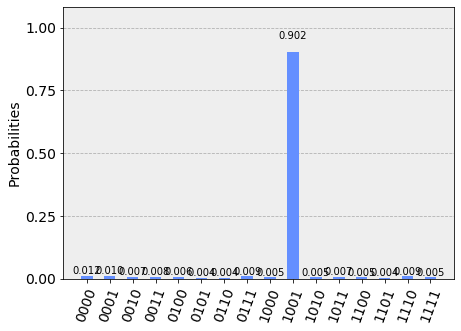

In [25]:
# Run the program
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
st = job.result().get_counts()
plot_histogram(st)

[1](http://localhost:8889/notebooks/algorithms/grover_algorithm.ipynb)
[2](http://dkopczyk.quantee.co.uk/grover-search/)
[3](https://quantumcomputing.stackexchange.com/questions/6325/grover-algorithm-for-a-database-search-where-is-the-quantum-advantage)
[4](https://www.quantiki.org/wiki/grovers-search-algorithm)

## Questions

1. **Does this algo can find more than only one solution?**
2. Why more iteration destory the output?